# SI Plots
* Code to load in CYGNUS limit data for spin-independent WIMP-proton cross section
* Also loads in neutrino floor for xenon and fluorine
* Also loads in current limits (2018) on the cross section

## First load in data

In [24]:
from numpy import *
import matplotlib.pyplot as plt

# CYGNUS-1000
data = loadtxt("../data/CYGNUS1000-ideal.txt")
m1000,F1000,He1000 = data[0,:], data[1,:], data[2,:]
He1000[He1000==0] = 1
F1000[F1000==0] = 1 # set all zeros to large number so minimum() can find interpolate between He and F

# CYGNUS-100k
data = loadtxt("../data/CYGNUS100k-ideal.txt")
m100k,F100k,He100k = data[0,:], data[1,:], data[2,:]
He100k[He100k==0] = Inf
F100k[F100k==0] = Inf

# CYGNUS-1000 no Direction
data = loadtxt("../data/CYGNUS1000-noDirection.txt")
m0,F0,He0 = data[0,:], data[1,:], data[2,:]
He0[He0==0] = Inf
F0[F0==0] = Inf

# CYGNUS-100k no Direction
data = loadtxt("../data/CYGNUS100k-noDirection.txt")
m1,F1,He1 = data[0,:], data[1,:], data[2,:]
He1[He1==0] = Inf
F1[F1==0] = Inf

# 2018 Current limits
data = loadtxt("../data/SIlimits_2018.txt",delimiter=',')
mlim,slim = data[0,:],data[1,:]

# Xe and F neutrino floors
data = loadtxt("../data/nufloor_Xe.txt",delimiter=',')
m2,nu_Xe = data[0,:],data[1,:]
data = loadtxt("../data/nufloor_F.txt",delimiter=',')
m3,nu_F = data[0,:],data[1,:]


## Then plot

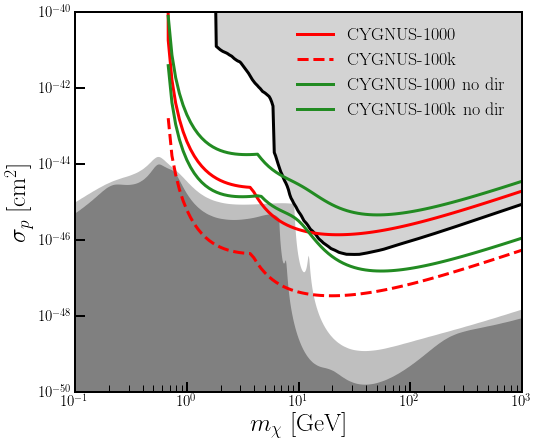

In [27]:
# Plot
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

xmin = 0.1
xmax = 1.0e3
ymax = 1.0e-40
ymin = 1.0e-50

# Neutrino floor
plt.fill_between(m2, nu_Xe, y2=ymin,facecolor='Gray')
plt.fill_between(m2, nu_F, y2=ymin,facecolor='Gray',alpha=0.5)

# Expt limits
plt.fill_between(mlim, slim, y2=ymax,facecolor='LightGray')
plt.loglog(mlim, slim,"-",linewidth=3,color='k')

# Plot lines
plt.loglog(m1000,minimum(F1000,He1000),'-',color='Red',linewidth=3,label='CYGNUS-1000')
plt.loglog(m100k,minimum(F100k,He100k),'--',color='Red',linewidth=3,label='CYGNUS-100k')
plt.loglog(m0,minimum(F0,He0),'-',color='ForestGreen',linewidth=3,label='CYGNUS-1000 no dir')
plt.loglog(m1,minimum(F1,He1),'-',color='ForestGreen',linewidth=3,label='CYGNUS-100k no dir')


# Labels
plt.legend(loc='upper right',fontsize=18,frameon=False)
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=25)
plt.ylabel(r"$\sigma_p$ [cm$^2$]",fontsize=25)

# Limits
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)


# Style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)

plt.show()
fig.savefig('../plots/Cygnus-SI.pdf')
